In [11]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import os
import sys

In [12]:
# 将当前目录添加到path
sys.path.append('/home/huqian/data/py_code/cv/')
sys.path

['/home/huqian',
 '/home/huqian/anaconda3/lib/python38.zip',
 '/home/huqian/anaconda3/lib/python3.8',
 '/home/huqian/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/huqian/anaconda3/lib/python3.8/site-packages',
 '/home/huqian/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/huqian/.ipython',
 '/home/huqian/data/py_code/cv/',
 '/home/huqian/data/py_code/cv/',
 '/home/huqian/data/py_code/cv/']

In [13]:
# from test.LossTrace import LossTrace
from utils.LossTracer import LossTracer
tracer = LossTracer()

In [14]:
root ='data/datasets'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.STL10(root, split='train', folds=None, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(
                                            trainset,
                                            batch_size=50,
                                            shuffle=True,
                                            num_workers=2
                                        )
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.STL10(root, split='test', folds=None, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(
                                            testset,
                                            batch_size=50,
                                            shuffle=True,
                                            num_workers=2
                                        )

Files already downloaded and verified
Files already downloaded and verified


In [15]:
# prepare model
model = torchvision.models.alexnet(pretrained=True, progress=True)
model.to(device)

# prepare optimizer and loss
optimizer = torch.optim.SGD(model.parameters(),lr=0.02,momentum=0.02)
criterion = torch.nn.CrossEntropyLoss()

In [6]:
from utils.Runner import ModelRunner
model_name='template'
runner = ModelRunner(model,optimizer,criterion,model_name,device=device)

In [7]:
history = {}

In [15]:
# runner.model
for i in range(10):
    epoch_base = runner.train(trainloader)
    history = runner.eval_all(trainloader,testloader,epoch_base,history=history)

epoch 101, round  20 loss:  0.0001565
epoch 101, round  40 loss:  0.0001012
epoch 101, round  60 loss:  0.0001351
epoch 101, round  80 loss:  0.0000861
epoch 101, round 100 loss:  0.0000601
epoch 102, round  20 loss:  0.0000802
epoch 102, round  40 loss:  0.0002439
epoch 102, round  60 loss:  0.0001184
epoch 102, round  80 loss:  0.0001590
epoch 102, round 100 loss:  0.0000591
epoch 103, round  20 loss:  0.0001019
epoch 103, round  40 loss:  0.0000779
epoch 103, round  60 loss:  0.0000904
epoch 103, round  80 loss:  0.0000566
epoch 103, round 100 loss:  0.0001320
epoch 104, round  20 loss:  0.0000967
epoch 104, round  40 loss:  0.0001772
epoch 104, round  60 loss:  0.0000652
epoch 104, round  80 loss:  0.0000918
epoch 104, round 100 loss:  0.0000845
epoch 105, round  20 loss:  0.0001229
epoch 105, round  40 loss:  0.0001707
epoch 105, round  60 loss:  0.0000645
epoch 105, round  80 loss:  0.0000615
epoch 105, round 100 loss:  0.0001006
epoch 106, round  20 loss:  0.0002129
epoch 106, r

/home/huqian/data/py_code/cv/utils/Runner.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob, index = torch.max(F.softmax(output), dim=1)


epoch 111, round  20 loss:  0.0000866
epoch 111, round  40 loss:  0.0000645
epoch 111, round  60 loss:  0.0000667
epoch 111, round  80 loss:  0.0001136
epoch 111, round 100 loss:  0.0000659
epoch 112, round  20 loss:  0.0000815
epoch 112, round  40 loss:  0.0000853
epoch 112, round  60 loss:  0.0000522
epoch 112, round  80 loss:  0.0000647
epoch 112, round 100 loss:  0.0000580
epoch 113, round  20 loss:  0.0000736
epoch 113, round  40 loss:  0.0000834
epoch 113, round  60 loss:  0.0000709
epoch 113, round  80 loss:  0.0002023
epoch 113, round 100 loss:  0.0000613
epoch 114, round  20 loss:  0.0001483
epoch 114, round  40 loss:  0.0000964
epoch 114, round  60 loss:  0.0001099
epoch 114, round  80 loss:  0.0000486
epoch 114, round 100 loss:  0.0000909
epoch 115, round  20 loss:  0.0000798
epoch 115, round  40 loss:  0.0000766
epoch 115, round  60 loss:  0.0002765
epoch 115, round  80 loss:  0.0006079
epoch 115, round 100 loss:  0.0001037
epoch 116, round  20 loss:  0.0001292
epoch 116, r

In [9]:
history

{'train_top_1': [0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'test_top_1': [22.4,
  22.775,
  22.3125,
  22.0625,
  21.8625,
  22.1375,
  21.975,
  21.6125,
  21.7,
  21.775],
 'epoch': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

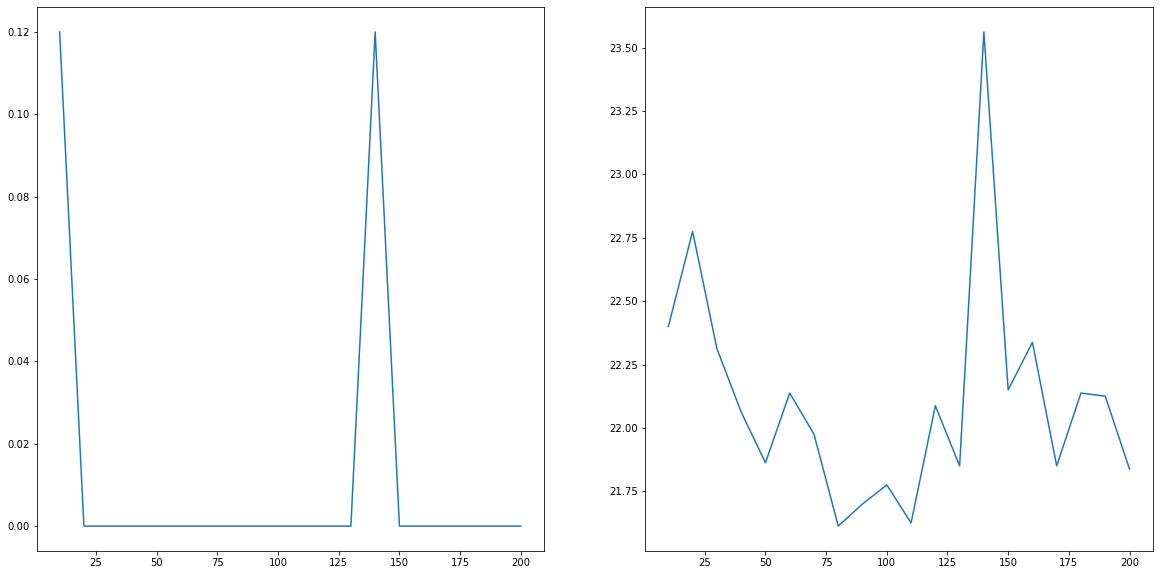

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history['epoch'],history['train_top_1'])
plt.subplot(1,2,2)
plt.plot(history['epoch'],history['test_top_1'])